<a href="https://colab.research.google.com/github/roshni33/100-days-of-AI/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn yfinance


In [ ]:
print(df.head().to_string()) #to print the DataFrame without truncation or alignment issues.


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.373957  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.687305  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.689537  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.021713  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.944681  237458000


In [ ]:
# Check for missing values
print(df.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#if in case there are missing vlaues then only Use ffill() for forward fill instead of fillna(method='ffill')
#fill forward fills missing values with recent non-missing values to maintain continoues sequence of data but in our case no need to use as no missing values
df.ffill(inplace=True)


In [ ]:
# 20-day Moving Average
df['MA20'] = df['Close'].rolling(window=20).mean()

# 50-day Moving Average
df['MA50'] = df['Close'].rolling(window=50).mean()


In [ ]:
# Calculate Price Differences
delta = df['Close'].diff()

# Gains and Losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate Exponential Moving Averages
window_length = 14
avg_gain = gain.ewm(com=window_length-1, min_periods=window_length).mean()
avg_loss = loss.ewm(com=window_length-1, min_periods=window_length).mean()

# Calculate RSI
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))


In [ ]:
# MACD Line
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']

# Signal Line
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [ ]:
# Lag features (previous day's close)
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['Lag3'] = df['Close'].shift(3)


In [ ]:
# Target variable
df['Target'] = df['Close'].shift(-1)


In [ ]:
df.dropna(inplace=True)


In [ ]:
# Features to be used for prediction
features = ['MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line', 'Lag1', 'Lag2', 'Lag3']

X = df[features]
y = df['Target']


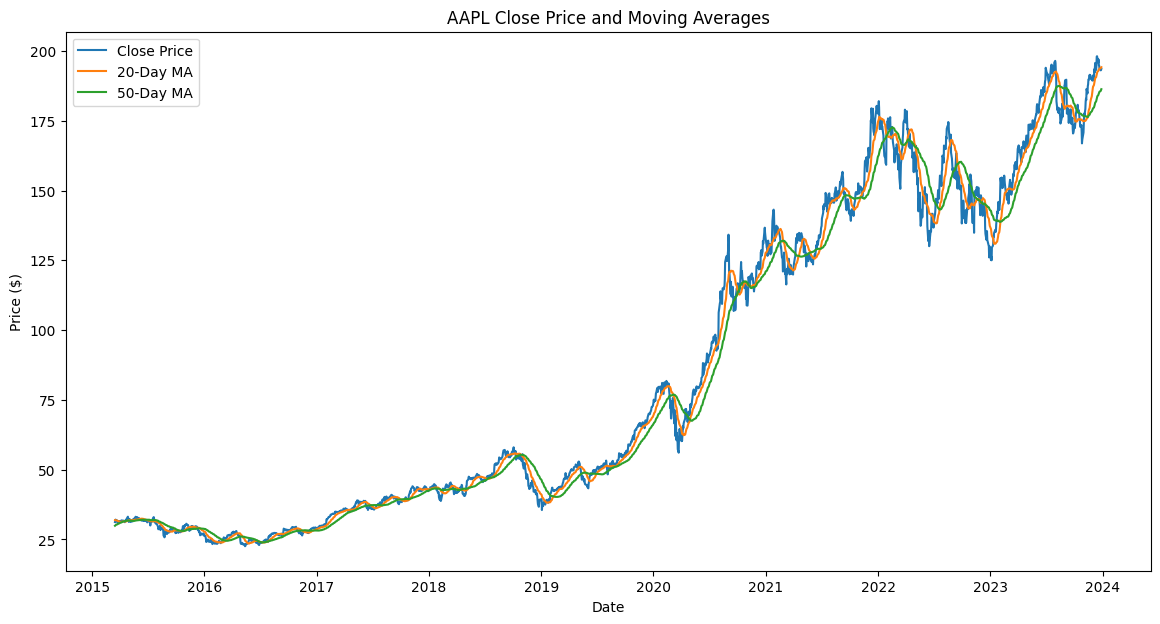

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA50'], label='50-Day MA')
plt.title('AAPL Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


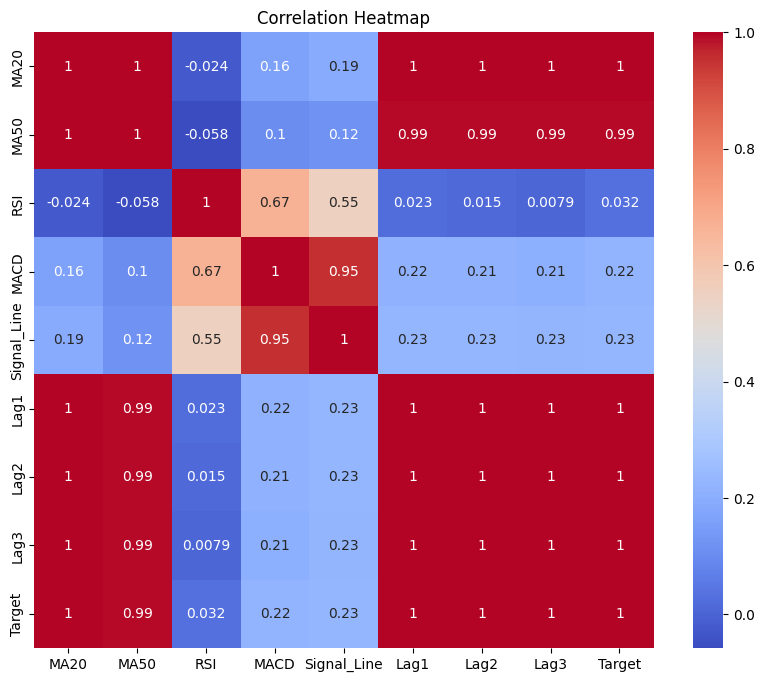

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['Target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define training and testing periods
split_ratio = 0.8
split = int(len(X) * split_ratio)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)

# Evaluation
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Performance:")
print(f"MSE: {lr_mse}")
print(f"MAE: {lr_mae}")
print(f"R-squared: {lr_r2}\n")


Linear Regression Performance:
MSE: 8.897430663695465
MAE: 2.2492650023857315
R-squared: 0.9742536265804258



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor Performance:")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}\n")


Random Forest Regressor Performance:
MSE: 66.01662946813819
MAE: 6.100538886007821
R-squared: 0.8089685822308614



In [ ]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train_scaled, y_train)

# Predictions
svr_pred = svr_model.predict(X_test_scaled)

# Evaluation
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regressor Performance:")
print(f"MSE: {svr_mse}")
print(f"MAE: {svr_mae}")
print(f"R-squared: {svr_r2}\n")


Support Vector Regressor Performance:
MSE: 52.39109391031763
MAE: 5.4245333114894345
R-squared: 0.8483966081153171



In [ ]:
import pandas as pd

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Regressor'],
    'MSE': [lr_mse, rf_mse, svr_mse],
    'MAE': [lr_mae, rf_mae, svr_mae],
    'R-squared': [lr_r2, rf_r2, svr_r2]
})

print(comparison_df)


                      Model        MSE       MAE  R-squared
0         Linear Regression   8.897431  2.249265   0.974254
1             Random Forest  66.016629  6.100539   0.808969
2  Support Vector Regressor  52.391094  5.424533   0.848397


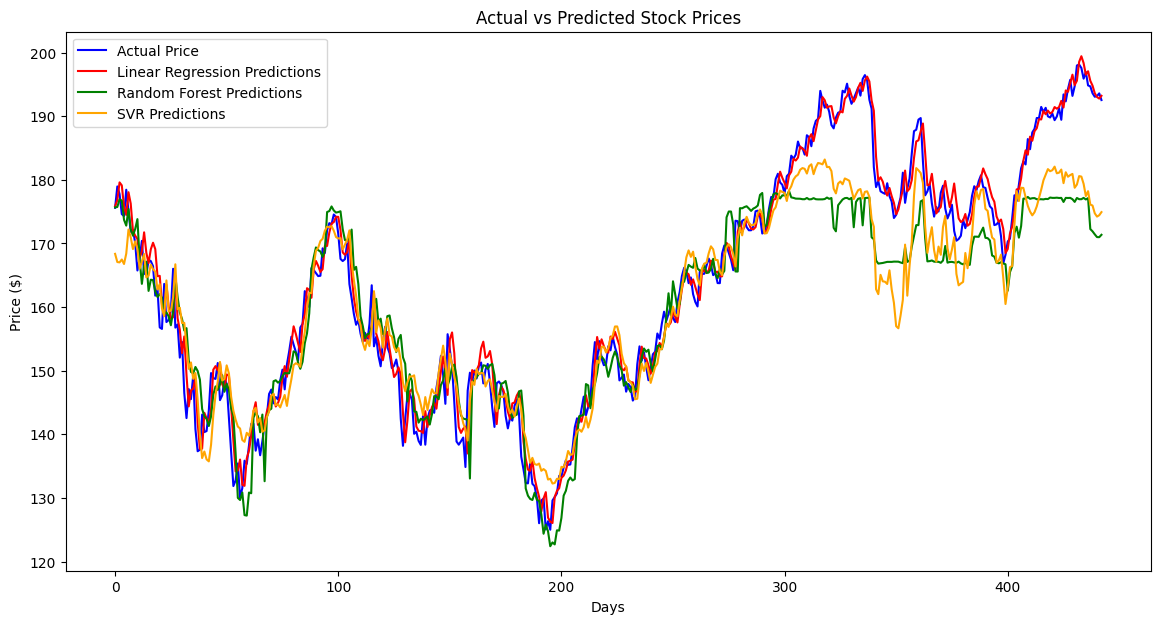

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(lr_pred, label='Linear Regression Predictions', color='red')
plt.plot(rf_pred, label='Random Forest Predictions', color='green')
plt.plot(svr_pred, label='SVR Predictions', color='orange')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
